In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [13]:
#load data
num_words=10000
maxlen=200

(X_train, y_train),(X_test, y_test)=keras.datasets.imdb.load_data(num_words=num_words)

In [14]:
X_train=keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test=keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [15]:
model= keras.Sequential([
    layers.Embedding(num_words, 128, input_length=max_len),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history=model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.7833 - loss: 0.4493 - val_accuracy: 0.8536 - val_loss: 0.3487
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8986 - loss: 0.2583 - val_accuracy: 0.8584 - val_loss: 0.3445
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9265 - loss: 0.1961 - val_accuracy: 0.8680 - val_loss: 0.3334
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9445 - loss: 0.1532 - val_accuracy: 0.8584 - val_loss: 0.3395
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9570 - loss: 0.1225 - val_accuracy: 0.8678 - val_loss: 0.4143


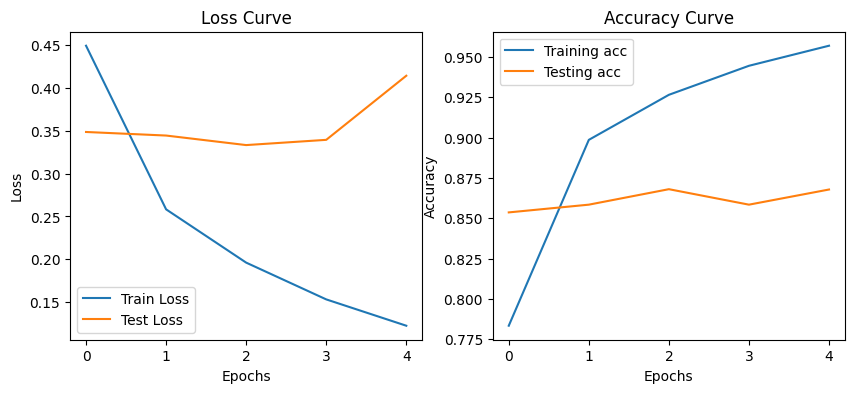

In [28]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Testing acc')
plt.title("Accuracy Curve")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
test_loss, test_acc=model.evaluate(X_test, y_test, verbose=1)
print(f"\nTesting Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.8579 - loss: 0.4426

Testing Accuracy: 0.8579


In [35]:
pred=(model.predict(X_test[:5])>0.5).astype(int)

for i in range(5):
    print("\nReview # ",i)
    print("\n Actual: ", y_test[i])
    print("\n Predicted: ",int(pred[i]))
    print("\n----------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Review #  0

 Actual:  0

 Predicted:  0

----------------------

Review #  1

 Actual:  1

 Predicted:  1

----------------------

Review #  2

 Actual:  1

 Predicted:  0

----------------------

Review #  3

 Actual:  0

 Predicted:  0

----------------------

Review #  4

 Actual:  1

 Predicted:  1

----------------------


C:\Users\ATHARVA GADEKAR\AppData\Local\Temp\ipykernel_23764\1283528452.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n Predicted: ",int(pred[i]))
